In [1]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns
import scipy.stats
from matplotlib import pyplot as plt
import math
import openpyxl
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import xlsxwriter
from sklearn import feature_selection


In [2]:
#Fundo a ser analisado
nome_da_base = 'pagaya'
col_fundos = ['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = "IBOXHY Index"
tempo = 12 #252

df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',index_col=0,decimal=',')

df_mensal = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')

df = pd.concat([df_mensal, df])

In [3]:
df['Retorno_Positivo'] = np.where(df.Retorno>=0, 1, 0)
df['Retorno_Negativo'] = np.where(df.Retorno<0, 1, 0)
df

,MesAno,data,Product,FinancialPrice,Mes_nomial,Mes,Ano,Retorno_1,Retorno,Retorno_Positivo,Retorno_Negativo
35,09-2021,2021-09-27,IBOXHY Index,331.783905,Sep,9,2021,NaN,NaN,0,0
31,08-2021,2021-08-31,IBOXHY Index,330.554413,Aug,8,2021,1.003719,0.371945,1,0
27,07-2021,2021-07-30,IBOXHY Index,329.035614,Jul,7,2021,1.004616,0.461590,1,0
23,06-2021,2021-06-30,IBOXHY Index,327.842102,Jun,6,2021,1.003641,0.364053,1,0
19,05-2021,2021-05-31,IBOXHY Index,324.357513,May,5,2021,1.010743,1.074302,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4,01-2019,2019-01-31,Pagaya Opportunity Fund,108.426552,Jan,1,2019,1.006100,0.609994,1,0
3,12-2018,2018-12-31,Pagaya Opportunity Fund,107.662148,Dec,12,2018,1.007100,0.709999,1,0
2,11-2018,2018-11-30,Pagaya Opportunity Fund,106.998756,Nov,11,2018,1.006200,0.619996,1,0
1,10-2018,2018-10-31,Pagaya Opportunity Fund,106.170624,Oct,10,2018,1.007800,0.779998,1,0


In [4]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno")
df_sub = df_sub.reset_index()
df_sub = df_sub.dropna()

In [5]:
df_sub.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
9,2018-09-28,2018,9,0.323904,0.660002,0.120008
10,2018-10-31,2018,10,-1.124030,0.779998,0.609267
11,2018-11-30,2018,11,-0.843012,0.619996,0.555944
12,2018-12-31,2018,12,2.045906,0.709999,0.533128
13,2019-01-31,2019,1,1.620364,0.609994,0.500834


In [6]:
#Cria a df_sub1 para calculo do tracking error 
def f(x):
    print(x.name)
    return x - df_sub[nome_benchmark] #diferenca entre o o retorno do fundo com o do benchmark

df_sub1 = df_sub.apply(lambda x: f(x) if x.name in col_fundos else x)

Pagaya Opportunity Fund
Riverview ALF


In [7]:
df_sub1.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
9,2018-09-28,2018,9,0.323904,0.336099,-0.203896
10,2018-10-31,2018,10,-1.124030,1.904029,1.733297
11,2018-11-30,2018,11,-0.843012,1.463008,1.398957
12,2018-12-31,2018,12,2.045906,-1.335907,-1.512778
13,2019-01-31,2019,1,1.620364,-1.010370,-1.119530


In [57]:
#Retorno Mensal
def function_retorno_relativo(df,i):
    pivot_table = pd.pivot_table(df,index=['Ano'],values=[col_fundos[i]],fill_value=0,aggfunc='prod',columns=['Mes'])#,margins=True,margins_name="Year")
    pivot_table=pivot_table.rename(columns={1: 'Jan', 2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec",'Riverview ALF':'Riverview ALF dif'})

    # backgroung color mapping
    my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
    return pivot_table.style.background_gradient(cmap=my_cmap,vmin = -5,vmax = 5)


In [9]:
for i in range(len(col_fundos)):
    function_retorno_relativo(df_sub1,i)

In [10]:
def vol_anualizada(x):
    return x.std() * (tempo**(1/2))

def retorno_anualizado(x,tempo):
    return (x.product()**(tempo/float(x.count())) - 1) * 100

def MDD(x):
    return min(((x/x.cummax()) - 1)*100)

def tracking_error(x,y):
    return (x-y).std()

def retorno_total(x):
    return (x.prod() - 1)*100

def Dias_Positivos(x):
    return x.sum()

def Dias_Negativos(x):
    return x.sum()


df.sort_values(by=["Product",'data'],ascending=False,inplace=True)
table = df.groupby('Product').agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_Negativo":Dias_Negativos,"Retorno_Positivo": Dias_Positivos,"Retorno_1" : [retorno_total, lambda x: retorno_anualizado(x,tempo)]}).rename(columns={'vol_anualizada':'Volatilidade Anualizada','<lambda_0>' :'Retorno Anualizado','retorno_total':'Retorno Total'})
table.columns = table.columns.droplevel(0)
table["Sharpe"] = table["Retorno Anualizado"] / table["Volatilidade Anualizada"]



df.sort_values(by=["Product",'data'],ascending=True,inplace=True)
table2 = df.groupby('Product').agg({"FinancialPrice":MDD}).rename(columns={"FinancialPrice":"Maximo Drawdown"})

df_univar = pd.concat([table,table2],axis=1).T
df_univar

Product,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
count,45.000,33.000,33.000
max,3.108,2.700,8.755
min,-6.993,0.540,-5.394
mean,0.477,0.813,1.284
Volatilidade Anualizada,5.073,1.579,7.056
Dias_Negativos,8.000,0.000,1.000
Dias_Positivos,37.000,33.000,32.000
Retorno Total,23.279,30.590,51.377
Retorno Anualizado,5.739,10.192,16.272
Sharpe,1.131,6.454,2.306


In [11]:
len(df_univar)

11

In [12]:
def regressao_linear(df,nome_do_fundo,nome_benchmark):   
    df_fundo = df.loc[df.Product == nome_do_fundo,['data','Retorno']]
    df_bench = df.loc[df.Product == nome_benchmark,['data','Retorno']]

    df_fundo.index = df_fundo['data']
    df_bench.index = df_bench['data']
    df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

    #Regressao Linear total
    x = (df_join['Retorno_x']).values.reshape((-1, 1))
    y= (df_join['Retorno_y']).values.reshape((-1, 1))
    
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x, y)
    return regr.coef_[0][0],regr.intercept_[0],regr.score(x, y)

k=0
v = []
for i in col_fundos:
    v.append(regressao_linear(df,i,nome_benchmark))
df_bivar = pd.DataFrame(v,index=col_fundos).rename(columns = {0:'Beta',1:'Alpha',2:'R^2'}).T
df_bivar

#Tracking Error
v=[]
for i in col_fundos:
    v.append(np.std(df_sub1[i]))


df_bivar.loc['Tracking Error'] = v
df_bivar

,Pagaya Opportunity Fund,Riverview ALF
Beta,-0.112,0.209
Alpha,0.872,1.174
R^2,0.167,0.029
Tracking Error,1.874,2.366


In [13]:
#Descritivas anuais
df_anuais = df.groupby(['Ano','Product']).agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_1" : [lambda x: retorno_anualizado(x,tempo)]}).unstack().T.reset_index().iloc[: , 1:]
df_anuais

Ano,level_1,Product,2017,2018,2019,2020,2021
0,count,IBOXHY Index,1.000,12.000,12.000,12.000,8.000
1,count,Pagaya Opportunity Fund,nan,4.000,12.000,12.000,5.000
2,count,Riverview ALF,nan,4.000,12.000,12.000,5.000
3,max,IBOXHY Index,0.859,2.046,1.917,3.108,1.074
4,max,Pagaya Opportunity Fund,nan,0.780,0.770,2.700,0.760
5,max,Riverview ALF,nan,0.609,1.866,4.616,8.755
6,min,IBOXHY Index,0.859,-1.124,0.046,-6.993,-0.460
7,min,Pagaya Opportunity Fund,nan,0.620,0.540,0.620,0.560
8,min,Riverview ALF,nan,0.120,0.476,-5.394,0.069
9,mean,IBOXHY Index,0.859,0.198,0.805,0.410,0.456


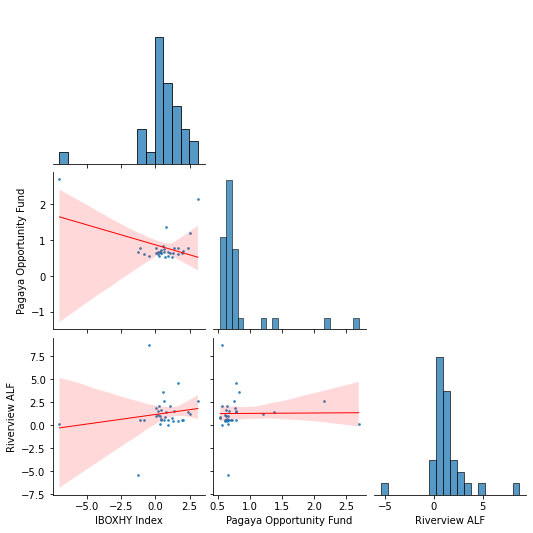

In [14]:
sns.pairplot(data=df_sub.iloc[:,3:],kind="reg",plot_kws={'line_kws':{'color':'red','lw':1},'scatter_kws': {'s': 3}},corner= True)
plt.savefig('fig_pairplot.png')

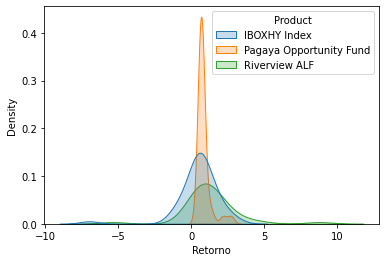

In [15]:
sns.kdeplot(data=df.reset_index(),x = 'Retorno',hue = 'Product',fill=True)
plt.savefig('retorno_density_distribution.png')

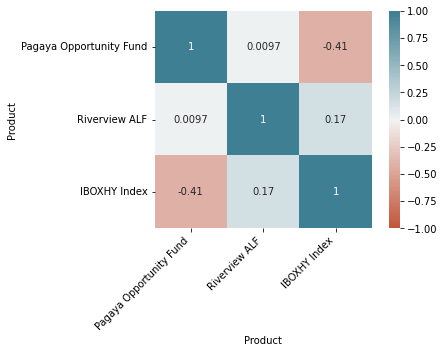

In [16]:
col_fundos1 =col_fundos
col_fundos1.append(nome_benchmark)
corr = df_sub[col_fundos].corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('CorrelationMatrix.png')

In [79]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('book.xlsx', engine='xlsxwriter')
workbook = writer.book
worksheet = workbook.add_worksheet('Relatorio')
df_sub.to_excel(writer,sheet_name = 'UnstackRetornosPercentuais')
df.to_excel(writer, sheet_name='StackRetornos1')

options = {
    'width': 256,
    'height': 100,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 20},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}

options2 = {
    'width': 290,
    'height': 20,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 10},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}
worksheet.insert_textbox('B2', 'Relatório Estatístico',options)


writer.sheets['Relatorio'] = worksheet

#Tabela de retornos coloridos
worksheet.insert_textbox('B8', 'Retorno do fundo - Retorno do benchmarck',options2)
table_size = len(df.Ano.unique()) + 4
for i in range(len(col_fundos)):
    function_retorno_relativo(df_sub1,i).to_excel(writer,sheet_name = 'Relatorio',float_format="%.2f",startrow=(8 + table_size*i), startcol=0,index_label='Retorno (%)')
    if i==len(col_fundos)-1:
        worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Retorno Benchmarck',options2)
        break
    worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Retorno do fundo - Retorno do benchmarck',options2)
    
#Graficos
i = 2*table_size+table_size*i
worksheet.insert_image('A'+ str(i),'fig_pairplot.png')
worksheet.insert_image('O'+ str(i),'retorno_density_distribution.png')
worksheet.insert_image('O'+ str(i+20) ,'CorrelationMatrix.png')    

#Tabelas com os resultados
df_univar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startrow=8,startcol = 15)
df_bivar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startcol=15,startrow = (8+ len(df_univar)+2))
    
#Formata tamanho da coluna
writer.sheets['Relatorio'].set_column(15, 18, 20)
writer.sheets['Relatorio'].set_column(0, 0, 20)
writer.save()

In [18]:
#Descritivas mensais

#df[['Retorno','MesAno','Product']].groupby(['MesAno','Product']).describe().unstack()


In [35]:
'A'+ v

'A32'

In [19]:
df.Product.unique()

array(['IBOXHY Index', 'Pagaya Opportunity Fund', 'Riverview ALF'],
      dtype=object)

In [20]:
#Calculo dos retornos mensais no diario
mensal = df[['Product','MesAno','Retorno_1']].groupby(['MesAno','Product']).agg(['prod']).unstack()#, 'min', 'max','std','count'

mensal.columns = mensal.columns.droplevel(0).droplevel(0)
mensal  = mensal.reset_index()
mensal[['ibov','paiva']] = mensal[['ibov','paiva']]*100 -100
mensal

KeyError: "None of [Index(['ibov', 'paiva'], dtype='object', name='Product')] are in the [columns]"

In [ ]:
df

In [ ]:
#Media Simples
{'paiva': mensal.paiva.mean(),'ibov': mensal.ibov.mean()}

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mensal.select_dtypes(include=numerics).columns
for i in mensal.select_dtypes(include=numerics).columns:
    sns.kdeplot(mensal[i], label=i, shade=True)

plt.title('')
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
anual = df.groupby(['Product','Ano'])[['Product','Ano','Retorno']].agg(['mean', 'count', 'std']).Retorno

ci95_hi = []
ci95_lo = []

for i in anual.index:
    m, c, s = anual.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))

anual['ci95_hi'] = ci95_hi
anual['ci95_lo'] = ci95_lo
print(anual)

In [ ]:

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
#some confidence interval
x=1
z=mean_confidence_interval(mensal.ibov,confidence=0.95)

fig, ax = plt.subplots()
ax.plot(x,z[0])
ax.fill_between(z[0], z[1], z[2], color='b', alpha=.1)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, (m-h), (m+h)

mean_confidence_interval(mensal.ibov,confidence=0.95)

In [ ]:
mean_confidence_interval(mensal.paiva,confidence=0.95)


In [ ]:
df.Product.unique()

In [ ]:
df[['Retorno','Product']]

In [ ]:
df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'IBX Index') ]

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IFMMIFMM Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)